# Linear Discriminant analysis (LDA) and Linear Regression Analysis

**Exercise: Predict sales performance based on sales drivers data.**  
Dataset can be downloaded from my GitHub repository: 
[dataset](https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/dataset_2_sales_drivers.txt)

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config Completer.use_jedi = False

In [2]:
# reading in training dataset from github repository
url = "https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/dataset_2_sales_drivers.txt"
sales_drivers_data = pd.read_csv(url, sep = "\t")

In [3]:
# shuffling dataset
sales_drivers_data = sales_drivers_data.sample(frac = 1).reset_index(drop = True)

In [4]:
# first five rows
sales_drivers_data.head()

,Closed_Flag,Closed_Deal,Lead_Source,Foll_Up_Calls,Criteria_Met,Sales_Office,Numeric_Lead_Source,Numeric_Sales_Office
0,0,No,Trade Show,4,2,South,0,0
1,0,No,Marketing Campaign,2,4,North,1,1
2,0,No,Marketing Campaign,5,2,South,1,0
3,0,No,Marketing Campaign,3,1,South,1,0
4,0,No,Trade Show,2,2,North,0,1


In [5]:
# general variable info
sales_drivers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Closed_Flag           235 non-null    int64 
 1   Closed_Deal           235 non-null    object
 2   Lead_Source           235 non-null    object
 3   Foll_Up_Calls         235 non-null    int64 
 4   Criteria_Met          235 non-null    int64 
 5   Sales_Office          235 non-null    object
 6   Numeric_Lead_Source   235 non-null    int64 
 7   Numeric_Sales_Office  235 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 14.8+ KB


In [6]:
# counting number of nulls
null_count = sales_drivers_data.isna().sum()
null_count[null_count > 0].sort_values(ascending = False)

Series([], dtype: int64)

In [7]:
# printing column names
for col in sales_drivers_data.columns:
        print(col)

Closed_Flag
Closed_Deal
Lead_Source
Foll_Up_Calls
Criteria_Met
Sales_Office
Numeric_Lead_Source
Numeric_Sales_Office


In [8]:
# retrieving general statistics for numerical variables
sales_drivers_data.describe()

,Closed_Flag,Foll_Up_Calls,Criteria_Met,Numeric_Lead_Source,Numeric_Sales_Office
count,235.000000,235.000000,235.000000,235.000000,235.000000
mean,0.076596,2.965957,2.387234,0.587234,0.480851
std,0.266517,1.797110,1.867126,0.493382,0.500700
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,0.000000,0.000000
50%,0.000000,2.000000,2.000000,1.000000,0.000000
75%,0.000000,4.000000,2.000000,1.000000,1.000000
max,1.000000,9.000000,10.000000,1.000000,1.000000


<Figure size 720x360 with 0 Axes>

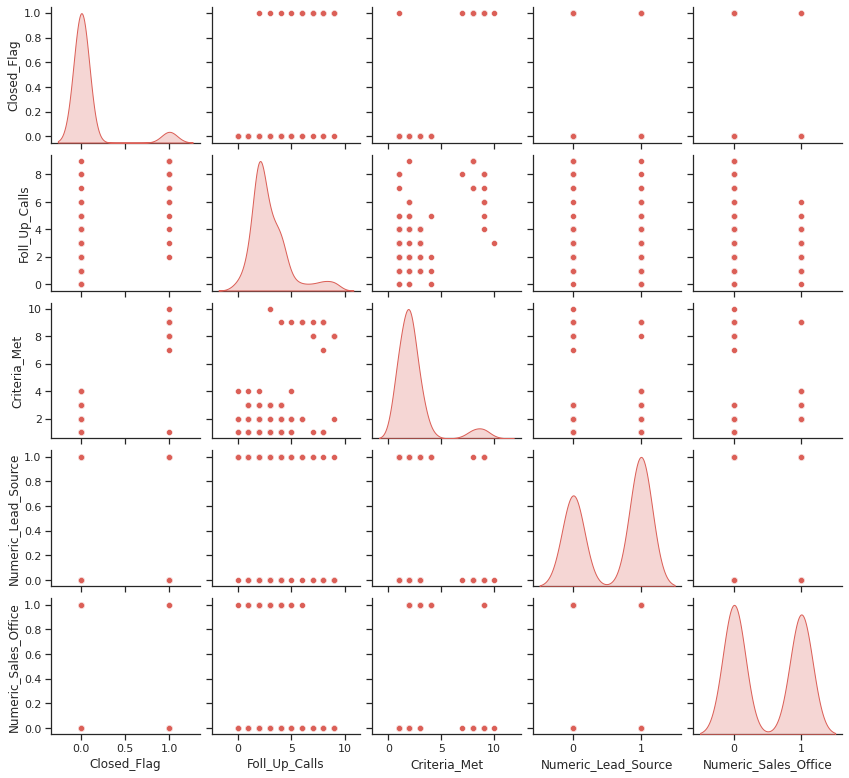

In [9]:
# numerical vairables corrleation and distributions
plt.style.use("fivethirtyeight")
plt.figure(figsize = (10,5))
sns.set_theme(style = "ticks")
sns.set_palette(sns.color_palette("hls", 8))
sns.pairplot(data = sales_drivers_data, diag_kind = "kde", height = 2.2, aspect = 1.1)
plt.show()

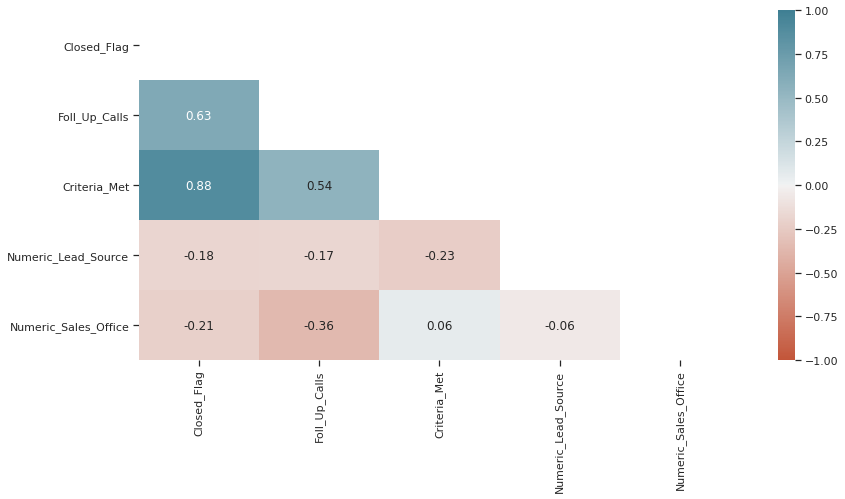

In [10]:
# Creating correlation matrix
corr_matrix = sales_drivers_data.corr()

# visualizing it
plt.figure(figsize = (12,6))
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask = mask, annot = True, vmin = -1, vmax = 1, 
            cmap = sns.diverging_palette(20, 220, as_cmap=True), fmt = ".2f")
plt.show()

## Machine Learning LDA Pipeline

In [11]:
# importing scikit-learn packages
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [12]:
# features
X = sales_drivers_data.iloc[:, [3,4,6,7]]
print(X.shape)

# label
y = sales_drivers_data.Closed_Deal
print(y.shape)

(235, 4)
(235,)


In [13]:
# checking data types
X.dtypes

Foll_Up_Calls           int64
Criteria_Met            int64
Numeric_Lead_Source     int64
Numeric_Sales_Office    int64
dtype: object

In [14]:
# splitting the data using K-Folds Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)
print("X_train:", len(X_train), "X_test:", len(X_test),
      "y_train:", len(X_train), "y_test:", len(X_test))

X_train: 188 X_test: 47 y_train: 188 y_test: 47


In [15]:
# creating simple imputer objects
simple_imp = SimpleImputer(strategy = "median")

In [16]:
# creating pipeline for numerical variable transformations
imp_std = make_pipeline(simple_imp)

In [17]:
# transforming variables using a column transformer
ct_imputer = make_column_transformer(
    (imp_std, ["Foll_Up_Calls", "Criteria_Met", "Numeric_Lead_Source", "Numeric_Sales_Office"])
)

In [18]:
# creating instance of linear discriminant analysis
lda = LinearDiscriminantAnalysis()

In [19]:
# creating a pipeline
pipe = make_pipeline(ct_imputer, lda)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Foll_Up_Calls',
                                                   'Criteria_Met',
                                                   'Numeric_Lead_Source',
                                                   'Numeric_Sales_Office'])])),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())])

In [20]:
# using cross val score function to test model accuracy
from sklearn.model_selection import cross_val_score
round(cross_val_score(pipe, X_train, y_train, cv = 5, scoring = "accuracy").mean(), 3)

0.995

In [21]:
# retrieving named steps in the pipeline
pipe.named_steps.keys()

dict_keys(['columntransformer', 'lineardiscriminantanalysis'])

In [22]:
# specifying hypertuning parameters to use in a grid search
params = {}
params["lineardiscriminantanalysis__solver"] = ["svd", "lsqr", "eigen"]

In [23]:
# creating grid search CV instance
from sklearn.model_selection import GridSearchCV

# timing training time
import time
start = time.time()
grid = GridSearchCV(pipe, params, cv = 5, scoring = "accuracy")
grid.fit(X_train, y_train);
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.46181154251098633s


In [24]:
# displaying grid search results
results = pd.DataFrame(grid.cv_results_).sort_values("rank_test_score").reset_index(drop = True)[:10]
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lineardiscriminantanalysis__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025629,0.008356,0.009494,0.002340,svd,{'lineardiscriminantanalysis__solver': 'svd'},1.0,1.0,1.0,1.0,0.972973,0.994595,0.010811,1
1,0.015525,0.001480,0.007240,0.000754,lsqr,{'lineardiscriminantanalysis__solver': 'lsqr'},1.0,1.0,1.0,1.0,0.972973,0.994595,0.010811,1
2,0.015152,0.000971,0.005957,0.000717,eigen,{'lineardiscriminantanalysis__solver': 'eigen'},1.0,1.0,1.0,1.0,0.972973,0.994595,0.010811,1


In [25]:
# printing best score and parameters
print("best score:", round(grid.best_score_, 2), "\n", "best parameters:", grid.best_params_, sep = "\n")

best score:
0.99


best parameters:
{'lineardiscriminantanalysis__solver': 'svd'}


In [26]:
# predicting passenger survival probabilities
pred_probs = grid.predict_proba(X_test)

In [27]:
# predicting passenger outcome
pred_out = grid.predict(X_test)

In [28]:
# concatenating target values and prediction probabilities
pred_results = pd.DataFrame(pred_probs, columns = ["no_prob", "yes_prob"])
pred_results = pred_results.apply(lambda x: round(x, 2))
pred_results.insert(0, "closed_deal", pred_out, True)
pred_results.head(10)

,closed_deal,no_prob,yes_prob
0,No,1.0,0.0
1,No,1.0,0.0
2,No,1.0,0.0
3,Yes,0.0,1.0
4,No,1.0,0.0
5,No,1.0,0.0
6,No,1.0,0.0
7,No,1.0,0.0
8,No,1.0,0.0
9,No,1.0,0.0


In [29]:
# importing scikitplot for machine learning evaluation metrics
import scikitplot as skplt

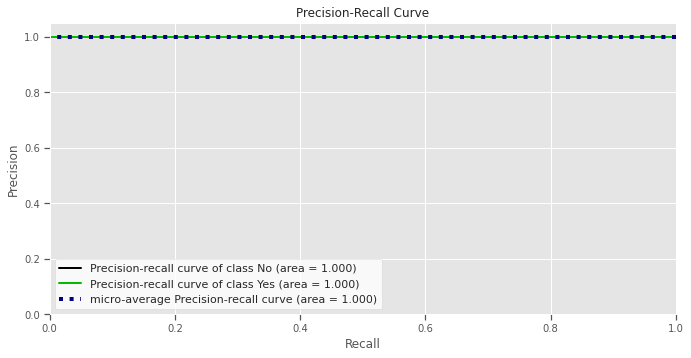

In [30]:
# plotting precision and recall curves
plt.style.use("ggplot")
skplt.metrics.plot_precision_recall(y_test, pred_probs, figsize = (10,5))
plt.legend(facecolor = "white")
plt.show()

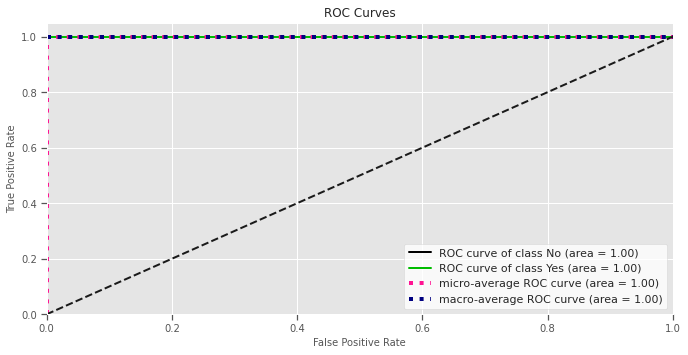

In [31]:
# plotting ROC curves
plt.style.use("ggplot")
skplt.metrics.plot_roc(y_test, pred_probs, figsize = (10,5))
plt.legend(facecolor = "white")
plt.show()

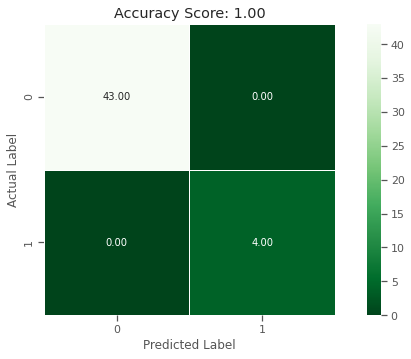

In [32]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_out)

plt.figure(figsize = (10,5))
sns.heatmap(cm, annot = True, fmt = ".2f", linewidths = .5, square = True,  cmap = "Greens_r");
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
plt.title("Accuracy Score: {:.2f}".format(round((cm[0, 0] + cm [1, 1]) / (np.sum(cm)),2)));

In [33]:
# precision
print("Precision Score: {:.2f}".format(round((cm[0, 0] / np.sum(cm[0])),2)))

# recall
print("Recall Score: {:.2f}".format(round((cm[0, 0] / np.sum(cm[:, 0])),2)))

Precision Score: 1.00
Recall Score: 1.00


## Machine Learning Linear Regression Pipeline

In [34]:
# features
X = sales_drivers_data.iloc[:, [3,4,6,7]]
print(X.shape)

# label
y = sales_drivers_data.Closed_Flag
print(y.shape)

(235, 4)
(235,)


In [35]:
# checking data types
X.dtypes

Foll_Up_Calls           int64
Criteria_Met            int64
Numeric_Lead_Source     int64
Numeric_Sales_Office    int64
dtype: object

In [36]:
# splitting the data using K-Folds Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)
print("X_train:", len(X_train), "X_test:", len(X_test),
      "y_train:", len(X_train), "y_test:", len(X_test))

X_train: 188 X_test: 47 y_train: 188 y_test: 47


In [37]:
# creating instance of linear regression model
linreg = LinearRegression()

In [38]:
# creating a pipeline
pipe = make_pipeline(ct_imputer, linreg)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Foll_Up_Calls',
                                                   'Criteria_Met',
                                                   'Numeric_Lead_Source',
                                                   'Numeric_Sales_Office'])])),
                ('linearregression', LinearRegression())])

In [39]:
# using cross val score function to test model accuracy
from sklearn.model_selection import cross_val_score
round(-1 * cross_val_score(pipe, X_train, y_train, cv = 5, scoring = "neg_root_mean_squared_error").mean(), 3)

0.103

In [40]:
# retrieving named steps in the pipeline
pipe.named_steps.keys()

dict_keys(['columntransformer', 'linearregression'])

In [41]:
# specifying hypertuning parameters to use in a grid search
params = {}
params["linearregression__normalize"] = [False, True]

In [42]:
# creating grid search CV instance
from sklearn.model_selection import GridSearchCV

# timing training time
import time
start = time.time()
grid = GridSearchCV(pipe, params, cv = 5, scoring = "neg_root_mean_squared_error")
grid.fit(X_train, y_train);
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.25617313385009766s


In [43]:
# displaying grid search results
results = pd.DataFrame(grid.cv_results_).sort_values("rank_test_score").reset_index(drop = True)[:10]
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_linearregression__normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014924,0.001928,0.006218,0.000997,False,{'linearregression__normalize': False},-0.069956,-0.108748,-0.074332,-0.075789,-0.187799,-0.103325,0.044447,1
1,0.014798,0.002200,0.006865,0.000944,True,{'linearregression__normalize': True},-0.069956,-0.108748,-0.074332,-0.075789,-0.187799,-0.103325,0.044447,2


In [44]:
# printing best score and parameters
print("best score:", round(-1 * grid.best_score_, 2), "\n", "best parameters:", grid.best_params_, sep = "\n")

best score:
0.1


best parameters:
{'linearregression__normalize': False}


In [45]:
# predicting passenger outcome
pred_out = grid.predict(X_test)
pred_out

array([ 0.08924385, -0.01689908,  0.07728018,  0.82238071, -0.02886274,
        0.06004366,  0.08464198, -0.05487902, -0.0481882 , -0.0481882 ,
        0.07267831, -0.0481882 ,  0.07200733, -0.05487902, -0.0481882 ,
       -0.05487902,  0.06004366, -0.0481882 , -0.0481882 ,  0.98582904,
       -0.05487902, -0.01689908, -0.05487902, -0.03555356,  0.07267831,
       -0.02358989, -0.02886274, -0.0481882 ,  0.07728018, -0.05487902,
       -0.02358989, -0.01689908, -0.05487902,  0.07267831, -0.0481882 ,
       -0.05487902,  0.88428799,  0.08924385, -0.03555356, -0.05487902,
        0.07728018,  0.85366984, -0.0481882 , -0.0481882 , -0.05487902,
        0.09660564, -0.0481882 ])

In [46]:
# comparing results
df_results_comparison = pd.DataFrame({"Actual" : y_test, "Predicted" : pred_out})
df_results_comparison[:10]

,Actual,Predicted
200,0,0.089244
169,0,-0.016899
234,0,0.077280
39,1,0.822381
78,0,-0.028863
114,0,0.060044
106,0,0.084642
148,0,-0.054879
122,0,-0.048188
119,0,-0.048188


In [47]:
# evaluating performance on test
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(
    "MAE: ", mean_absolute_error(y_test, pred_out), "\n",
    "MSE: ", mean_squared_error(y_test, pred_out), "\n",
    "RMSE: ", np.sqrt(mean_absolute_error(y_test, pred_out)), "\n"
)

MAE:  0.058746976184512315 
 MSE:  0.004403400245867288 
 RMSE:  0.24237775513547508 

